In [1]:
%matplotlib inline
import os
import numpy as np 
import matplotlib
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import glob
import matplotlib.pylab as pylab

import matplotlib.dates as mdates
import pandas as pd

pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

def prettify_plot(): 
    ""'Hides top and rightmos axis spines and also some other stuff. '""
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_axis_bgcolor('none')
    plt.grid(b=False, which='major')

In [2]:
# read in weather data
# scp WIN\\ascott47@wha.eps.jhu.edu:/var/lib/weewx/olinhall-weewx.sdb .
import sqlite3
conn = sqlite3.connect('olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

In [132]:
# files = ['./data/rooftest2016/52bubblewraponmetal.csv',
#  './data/rooftest2016/blackmarkernorth.csv',
#  './data/rooftest2016/1tcontrolshield.csv',
#  './data/rooftest2016/51tfoilshieldonmetal.csv',
#  './data/rooftest2016/blackhorizontaleast.csv',
#  './data/rooftest2016/controlsingleshield.csv',
#  './data/rooftest2016/oldshieldt.csv',
#  './data/rooftest2016/insideoutnorth.csv',
#  './data/rooftest2016/professionalshieldupdate.csv',
#  './data/rooftest2016/noshieldnorth.csv',
#  './data/rooftest2016/10toldshielonmetal.csv',
#  './data/rooftest2016/professionalshieldt2.csv',
#  './data/rooftest2016/6tnoshielddown.csv',
#  './data/rooftest2016/foilshieldt.csv',
#  './data/rooftest2016/blacknorth.csv',
#  './data/rooftest2016/professionalshield.csv']
files = glob.glob('data/june132016/*.csv')
frames = []
sensornumbers = []
date_spec = {'Date': [ 0]}
for file in files:
    try :
#        colnumber = int(os.path.splitext(os.path.basename(file))[0][0:-1])
        colnumber = os.path.splitext(os.path.basename(file))[0]#[0:-1]
        frame = pd.read_csv(file, sep = ',',
        skiprows = 19,
        parse_dates = date_spec,
        keep_date_col=True)
        frame = frame.set_index('Date').rename(columns = {'Value': colnumber})

#         try:
#                 startdate = pd.to_datetime(meta['time'][colnumber]) #when the sensor was installed according to metadata
#                 ind = np.argmin([abs(frame.index -startdate)]) # Find the closest recording time to when put out
#                 frames.append(frame[ind+1:]) # only save the data from the hour after the sensor was installed
#         except KeyError:
        frames.append(frame)

    except ValueError:
        print "oops... something went wrong"
startDate = '2016-06-03'
endDate = '2016-06-13'
frames.append(olinhalldf.outTemp[startDate:endDate])
tempDF = pd.concat(frames, axis=1)[startDate:endDate].resample('2H')#.min()
# tempDF = pd.concat(frames, axis =1)
# tempDF = tempDF['2016-05-07':'2016-05-10'].resample('H')
# tempDF.columns = ['Foil Cup', 'No Shield', 'Old Shield', 'Professional Shield', 'Lateral Old', 'Cup']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


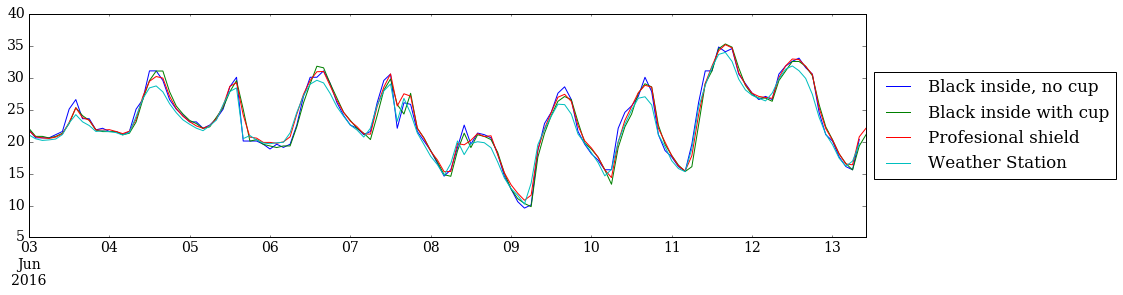

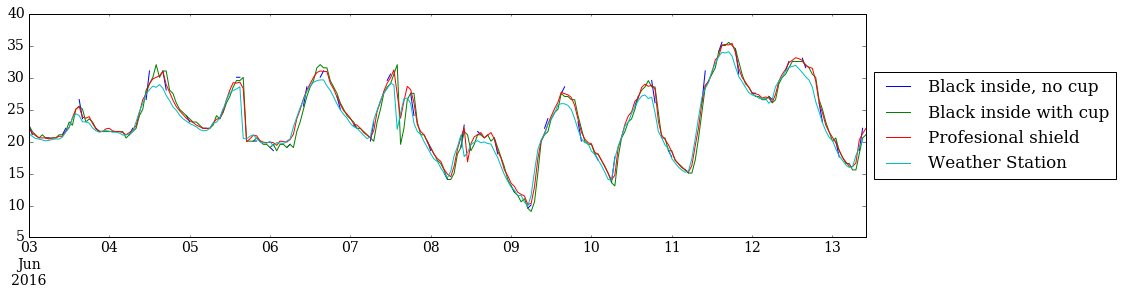

In [146]:
tempDF = pd.concat(frames, axis=1)[startDate:endDate].resample('2H')#
tempDF.plot(figsize = [15,4])
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.figure()
tempDF = pd.concat(frames, axis=1)[startDate:endDate].resample('1H')#
tempDF.plot(figsize = [15,4])
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  app.launch_new_instance()


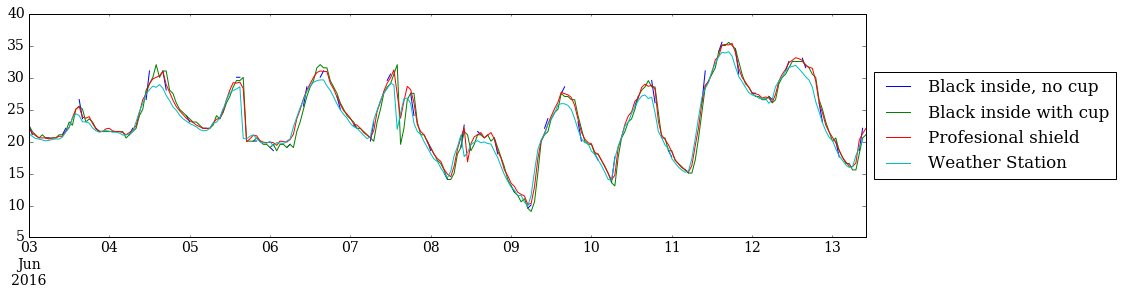

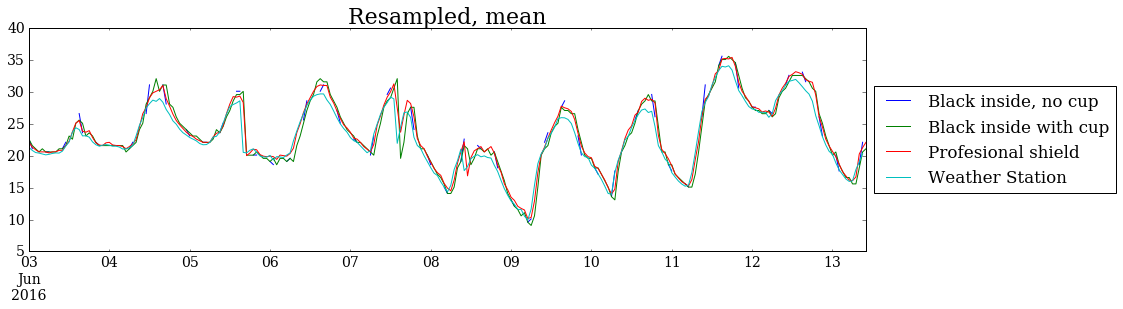

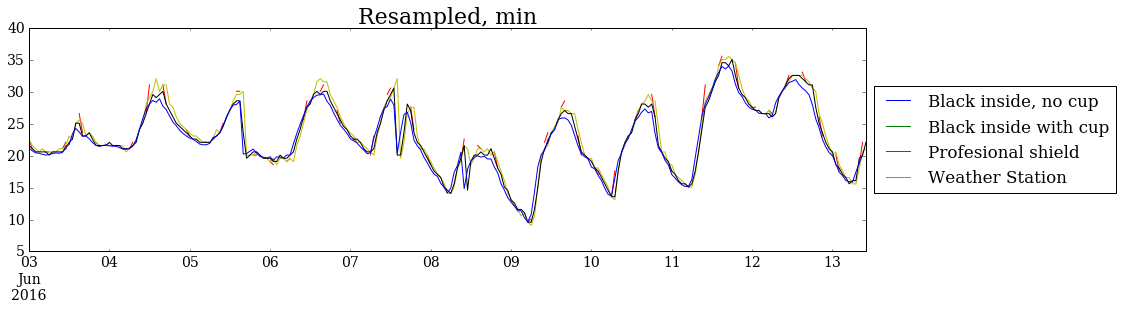

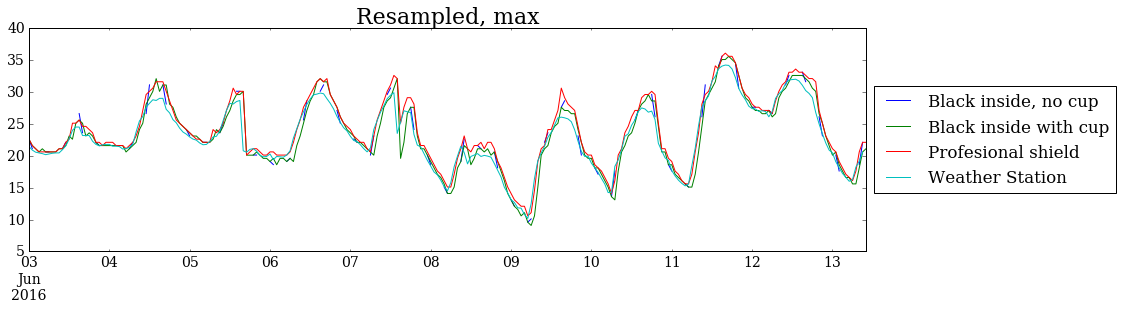

In [148]:
plt.figure()
tempDF = pd.concat(frames, axis=1)[startDate:endDate].resample('1H')#
tempDF.plot(figsize = [15,4])
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.figure()
tempDF = pd.concat(frames, axis=1)[startDate:endDate].resample('1H').mean()#
tempDF.plot(figsize = [15,4])
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Resampled, mean')

plt.figure()
tempDF = pd.concat(frames, axis=1)[startDate:endDate].resample('1H').min()#
tempDF.plot(figsize = [15,4])
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Resampled, min')


plt.figure()
tempDF = pd.concat(frames, axis=1)[startDate:endDate].resample('1H').max()#
tempDF.plot(figsize = [15,4])
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Resampled, max')


In [125]:
tempDF = None

In [142]:
tempDF.columns

Index([u'blackinsidenocup', u'blackinsidewithcup', u'professionalshield',
       u'outTemp'],
      dtype='object')

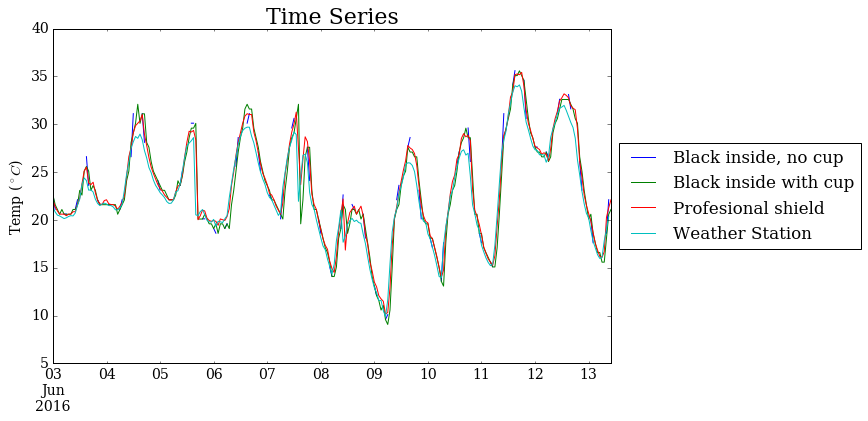

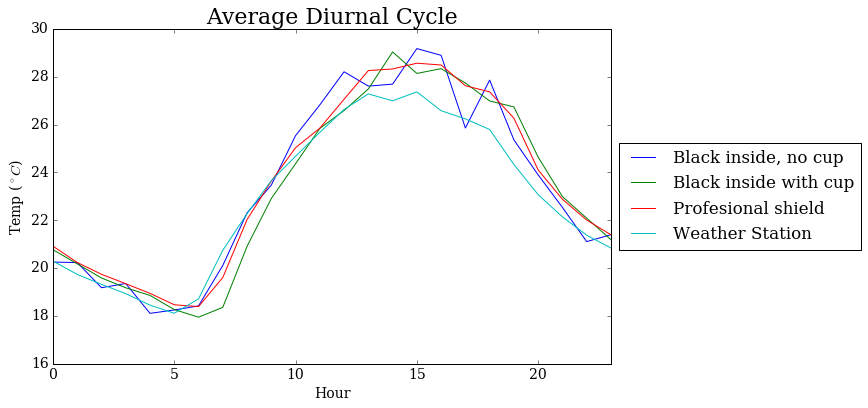

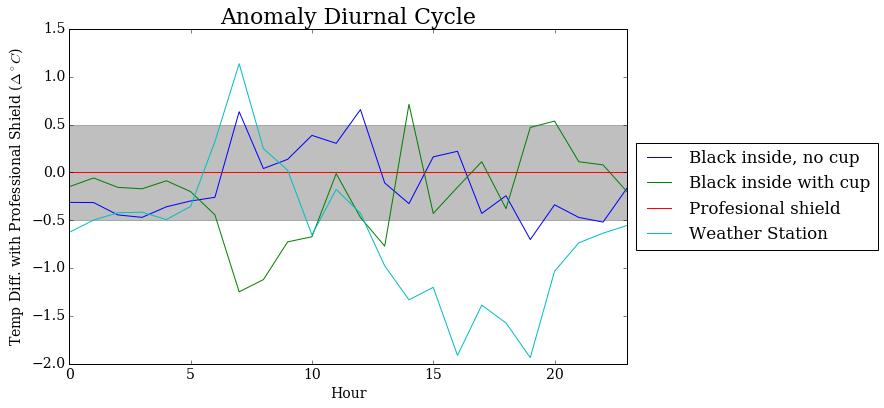

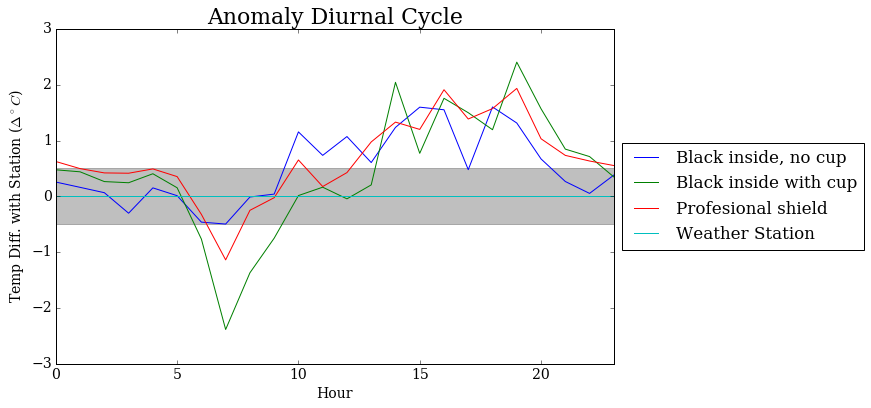

In [143]:
#legendnames = ['Foil Cup', 'Old Shield', 'No Shield', 'Professional Shield', 'Lateral shield', 'Plain Cup'] #['FoilCup', 'Professional','PlainCup', 'OldShield']
legendnames = ['Black inside, no cup', 'Black inside with cup',  'Profesional shield', 'Weather Station']
figsize = [10,6]
tempDF.plot(figsize= figsize)
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Time Series')
plt.ylabel('Temp ($^\circ C$)')

tempDF.groupby(tempDF.index.hour).mean().plot(figsize=figsize)
plt.legend(legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Diurnal Cycle')
plt.ylabel('Temp ($^\circ C$)')
plt.xlabel('Hour')

tempDF.subtract(tempDF['professionalshield'], axis=0).groupby(tempDF.index.hour).mean().plot(figsize= figsize)
plt.legend(legendnames,
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Anomaly Diurnal Cycle')
plt.ylabel('Temp Diff. with Professional Shield ($\Delta ^\circ C$)')
plt.axhspan(-.5, .5, alpha = 0.25, color = 'black')
plt.xlabel('Hour')

tempDF.subtract(tempDF['outTemp'], axis=0).groupby(tempDF.index.hour).mean().plot(figsize= figsize)
plt.legend(legendnames,
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Anomaly Diurnal Cycle')
plt.ylabel('Temp Diff. with Station ($\Delta ^\circ C$)')
plt.axhspan(-.5, .5, alpha = 0.25, color = 'black')
plt.xlabel('Hour')

In [17]:
tempDF.columns

Index([u'2015shield', u'blackinsidenocup', u'noshieldfacingdown',
       u'blackinsidewithcup', u'professionalshield', u'outTemp'],
      dtype='object')

In [19]:
olinhalldf.columns

Index([u'usUnits', u'interval', u'barometer', u'pressure', u'altimeter',
       u'inTemp', u'outTemp', u'inHumidity', u'outHumidity', u'windSpeed',
       u'windDir', u'windGust', u'windGustDir', u'rainRate', u'rain',
       u'dewpoint', u'windchill', u'heatindex', u'ET', u'radiation', u'UV',
       u'extraTemp1', u'extraTemp2', u'extraTemp3', u'soilTemp1', u'soilTemp2',
       u'soilTemp3', u'soilTemp4', u'leafTemp1', u'leafTemp2', u'extraHumid1',
       u'extraHumid2', u'soilMoist1', u'soilMoist2', u'soilMoist3',
       u'soilMoist4', u'leafWet1', u'leafWet2', u'rxCheckPercent',
       u'txBatteryStatus', u'consBatteryVoltage', u'hail', u'hailRate',
       u'heatingTemp', u'heatingVoltage', u'supplyVoltage',
       u'referenceVoltage', u'windBatteryStatus', u'rainBatteryStatus',
       u'outTempBatteryStatus', u'inTempBatteryStatus'],
      dtype='object')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


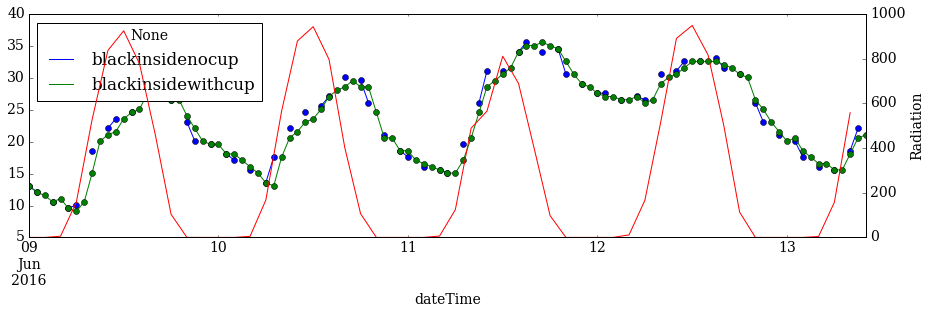

In [67]:
tempDF['blackinsidenocup'].plot(style = '-o', figsize=[15,4])
tempDF['blackinsidewithcup'].plot(style = '-o',)

plt.legend(#legendnames,
           loc='center left', bbox_to_anchor=(1.0, 0.5))

olinhalldf[startDate:endDate]['radiation'].resample('2H').plot(secondary_y=True)
plt.ylabel('Radiation')


In [155]:
olinhalldf.columns

Index([u'usUnits', u'interval', u'barometer', u'pressure', u'altimeter',
       u'inTemp', u'outTemp', u'inHumidity', u'outHumidity', u'windSpeed',
       u'windDir', u'windGust', u'windGustDir', u'rainRate', u'rain',
       u'dewpoint', u'windchill', u'heatindex', u'ET', u'radiation', u'UV',
       u'extraTemp1', u'extraTemp2', u'extraTemp3', u'soilTemp1', u'soilTemp2',
       u'soilTemp3', u'soilTemp4', u'leafTemp1', u'leafTemp2', u'extraHumid1',
       u'extraHumid2', u'soilMoist1', u'soilMoist2', u'soilMoist3',
       u'soilMoist4', u'leafWet1', u'leafWet2', u'rxCheckPercent',
       u'txBatteryStatus', u'consBatteryVoltage', u'hail', u'hailRate',
       u'heatingTemp', u'heatingVoltage', u'supplyVoltage',
       u'referenceVoltage', u'windBatteryStatus', u'rainBatteryStatus',
       u'outTempBatteryStatus', u'inTempBatteryStatus'],
      dtype='object')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


Mean difference 0.0938666666667


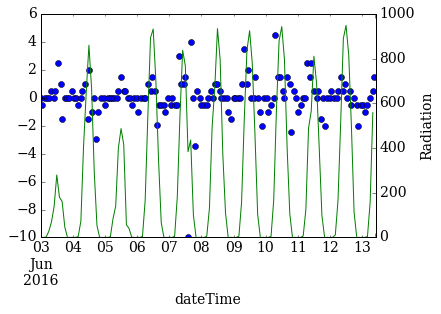

In [157]:
(tempDF['blackinsidenocup']- tempDF['blackinsidewithcup']).plot(style = 'o')
olinhalldf[startDate:endDate]['radiation'].resample('2H').plot(secondary_y=True)
#olinhalldf[startDate:endDate]['windSpeed'].resample('2H').plot(secondary_y=True)

plt.ylabel('Radiation')
print 'Mean difference', (tempDF['blackinsidenocup']- tempDF['blackinsidewithcup']).mean()

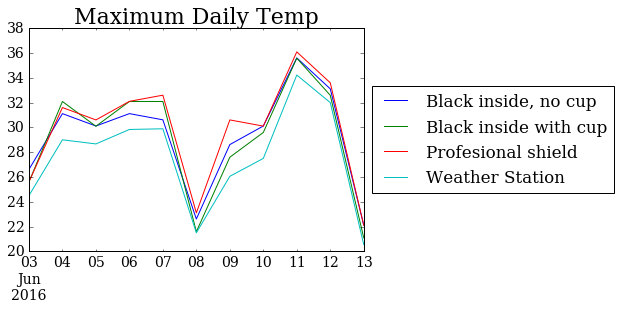

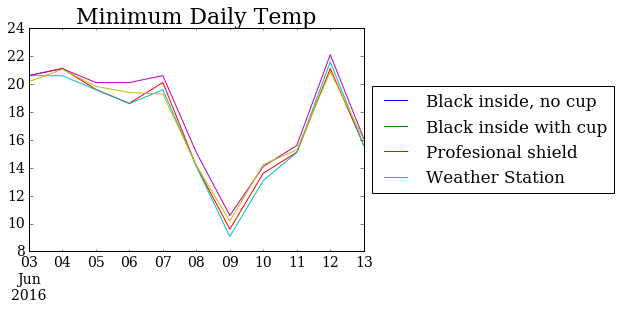

In [154]:
tempDF.resample('D').max().plot()
plt.legend(legendnames,
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Maximum Daily Temp')

tempDF.resample('D').min().plot()
plt.legend(legendnames,
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Minimum Daily Temp')


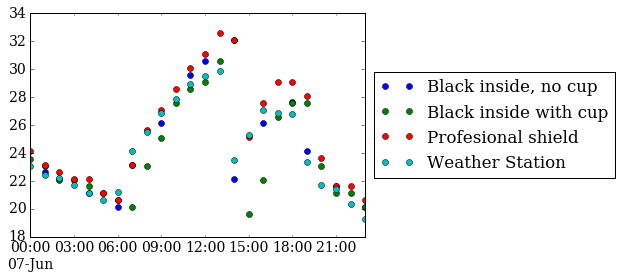

In [159]:
tempDF['2016-06-07'].plot(style = 'o')
plt.legend(legendnames,
           loc='center left', bbox_to_anchor=(1.0, 0.5))


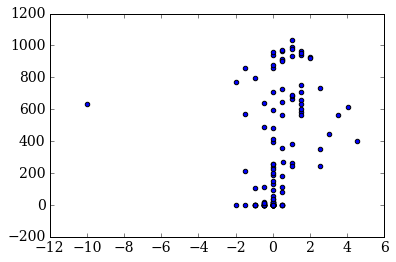

In [141]:
dt = (tempDF['blackinsidenocup']- tempDF['blackinsidewithcup']).resample('2H').max()
rad = olinhalldf[startDate:endDate]['radiation'].resample('2H').max()
plt.scatter(dt[:-1],rad)

In [94]:
np.corrcoef(dt[:-1],rad)[0,1]

0.43851889065281657

In [92]:
np.corrcoef(tempDF['blackinsidenocup'][:-1],rad)[0,1]

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [36]:
np.corrcoef(tempDF['blackinsidewithcup'],olinhalldf[startDate:endDate]['radiation'].resample('2H').mean())[0,1]

0.42776256549215474

In [28]:
olinhalldf[startDate:endDate]['radiation'].resample('1H').mean().shape

(106,)

ValueError: x and y must be the same size

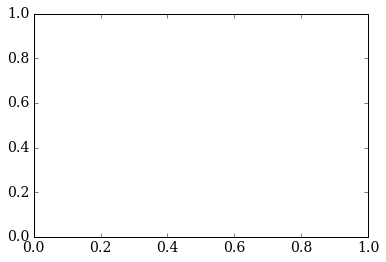

In [12]:
dt = (tempDF['blackinsidenocup']- tempDF['blackinsidewithcup'])
plt.scatter(dt,olinhalldf[startDate:endDate]['radiation'].resample('2H').mean())

In [39]:
print 'Cup r = ', np.corrcoef(tempDF['blackinsidewithcup'],olinhalldf[startDate:endDate]['outTemp'].resample('2H').mean())[0,1]
print 'No cup r = ', np.corrcoef(tempDF['blackinsidenocup'],olinhalldf[startDate:endDate]['outTemp'].resample('2H').mean())[0,1]

Cup r =  0.959122055272
No cup r =  0.975464052017


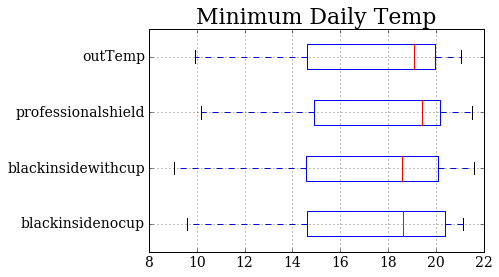

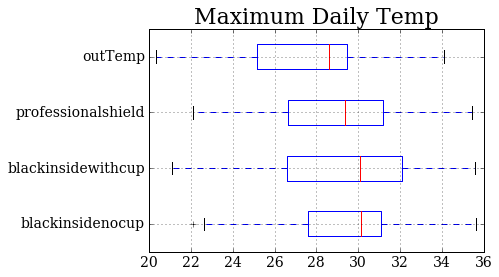

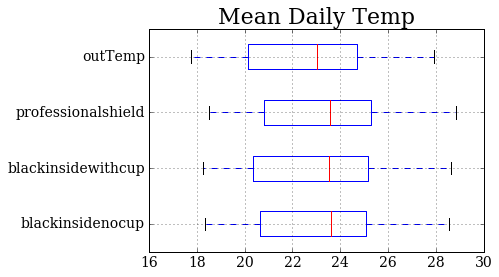

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111)
handle = tempDF.resample('D').min().boxplot(return_type='axes',vert=False)
plt.title('Minimum Daily Temp')
#tickHandle = ax.set_xticklabels(legendnames, rotation=90 )

fig = plt.figure()
#ax = fig.add_subplot(111)
handle = tempDF.resample('D').max().boxplot(return_type='axes',vert=False)
plt.title('Maximum Daily Temp')
#tickHandle = ax.set_xticklabels(legendnames, rotation=-45 )

fig = plt.figure()
#ax = fig.add_subplot(111)
handle = tempDF.resample('D').mean().boxplot(return_type='axes',vert=False)
plt.title('Mean Daily Temp')

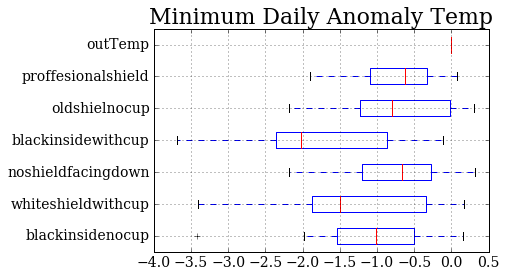

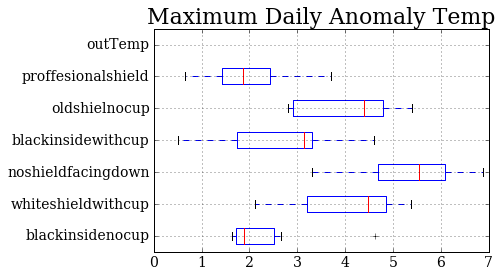

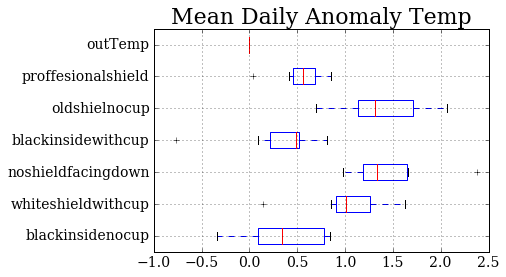

In [30]:
anomalyDF = tempDF.subtract(tempDF['outTemp'], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
handle = anomalyDF.resample('D').min().boxplot(return_type='axes',vert=False)
plt.title('Minimum Daily Anomaly Temp')
#tickHandle = ax.set_xticklabels(legendnames, rotation=90 )

fig = plt.figure()
#ax = fig.add_subplot(111)
handle = anomalyDF.resample('D').max().boxplot(return_type='axes',vert=False)
plt.title('Maximum Daily Anomaly Temp')
#tickHandle = ax.set_xticklabels(legendnames, rotation=-45 )

fig = plt.figure()
#ax = fig.add_subplot(111)
handle = anomalyDF.resample('D').mean().boxplot(return_type='axes',vert=False)
plt.title('Mean Daily Anomaly Temp')

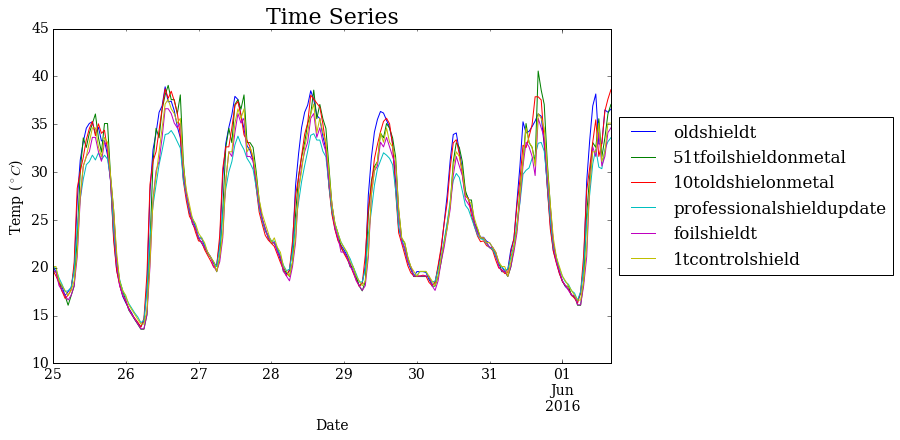

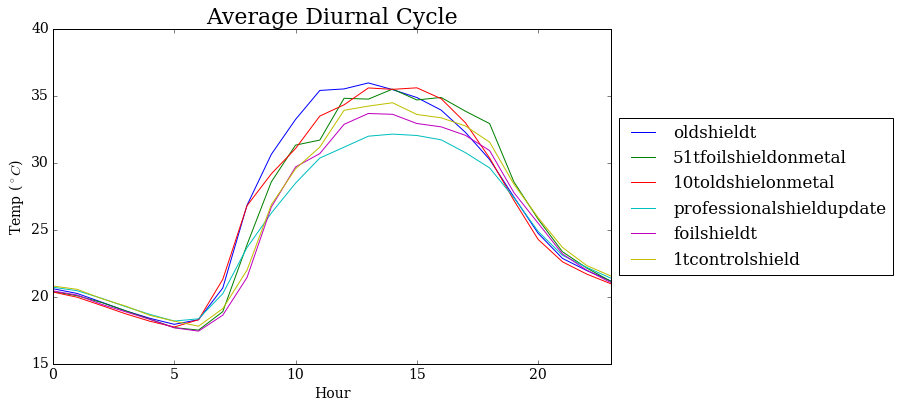

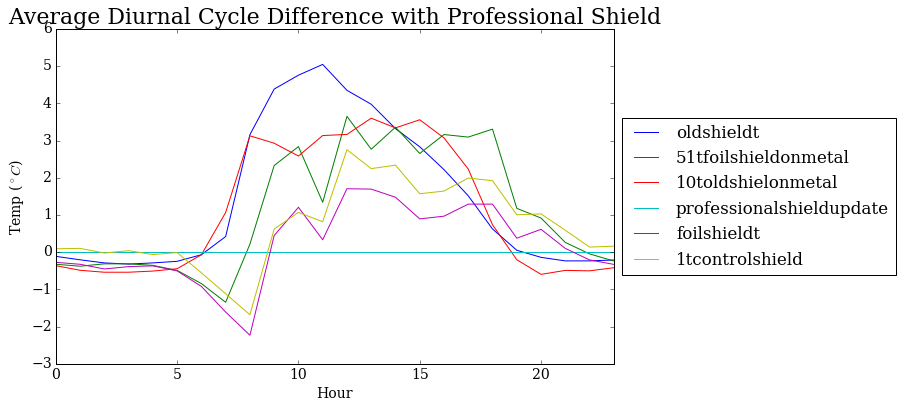

In [64]:
# metal shields
figsize = [10,6]
cols = [u'oldshieldt', '51tfoilshieldonmetal',  u'10toldshielonmetal', 
        u'professionalshieldupdate', u'foilshieldt', u'1tcontrolshield', ]
tempDF[cols].plot(figsize= figsize)
plt.legend(#legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Time Series')
plt.ylabel('Temp ($^\circ C$)')

tempDF[cols].groupby(tempDF.index.hour).mean().plot(figsize=figsize)
plt.legend(#legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Diurnal Cycle')
plt.ylabel('Temp ($^\circ C$)')
plt.xlabel('Hour')

tempDF[cols].subtract(tempDF['professionalshieldupdate'], axis=0).groupby(tempDF.index.hour).mean().plot(figsize=figsize)
plt.legend(#legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Diurnal Cycle Difference with Professional Shield')
plt.ylabel('Temp ($^\circ C$)')
plt.xlabel('Hour')

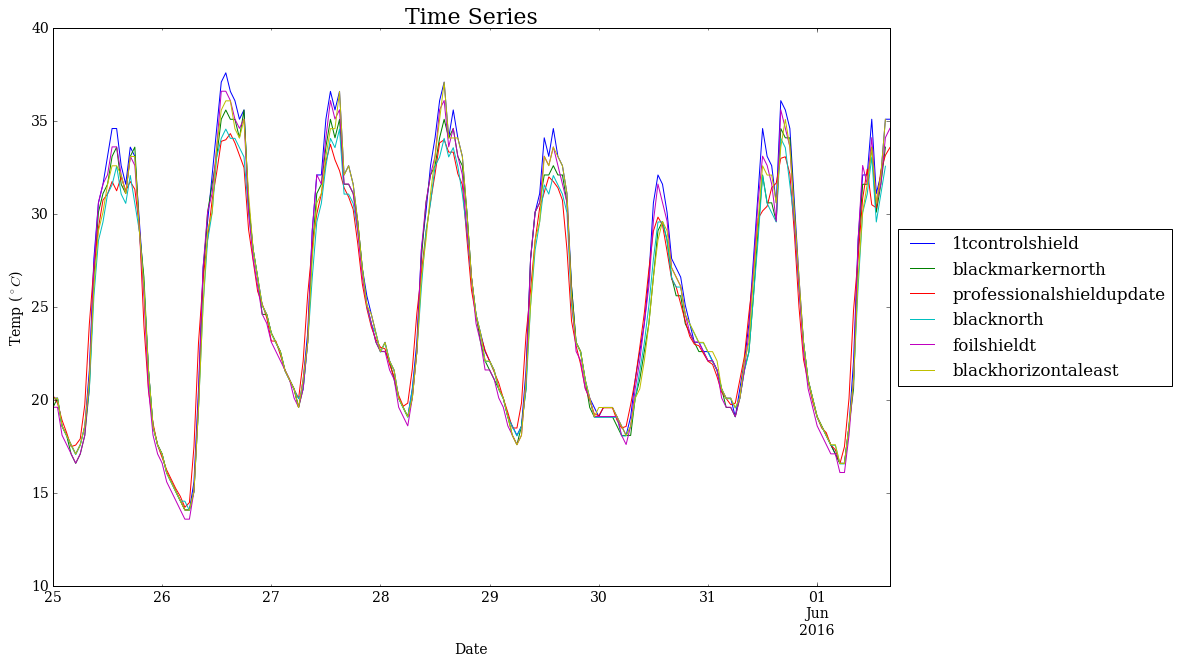

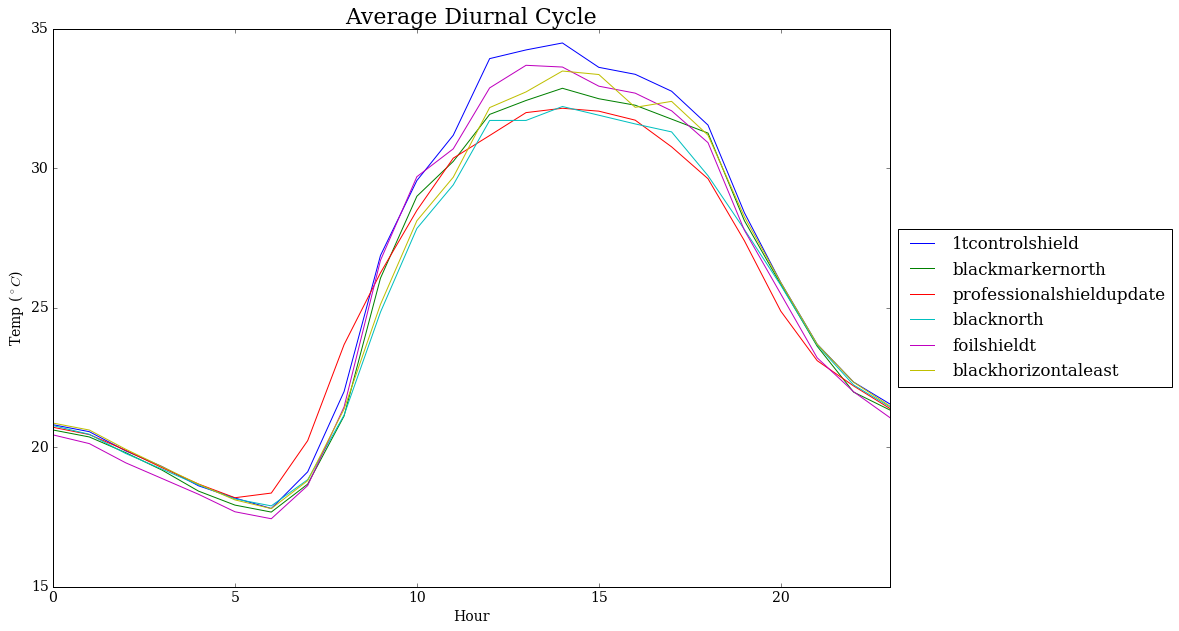

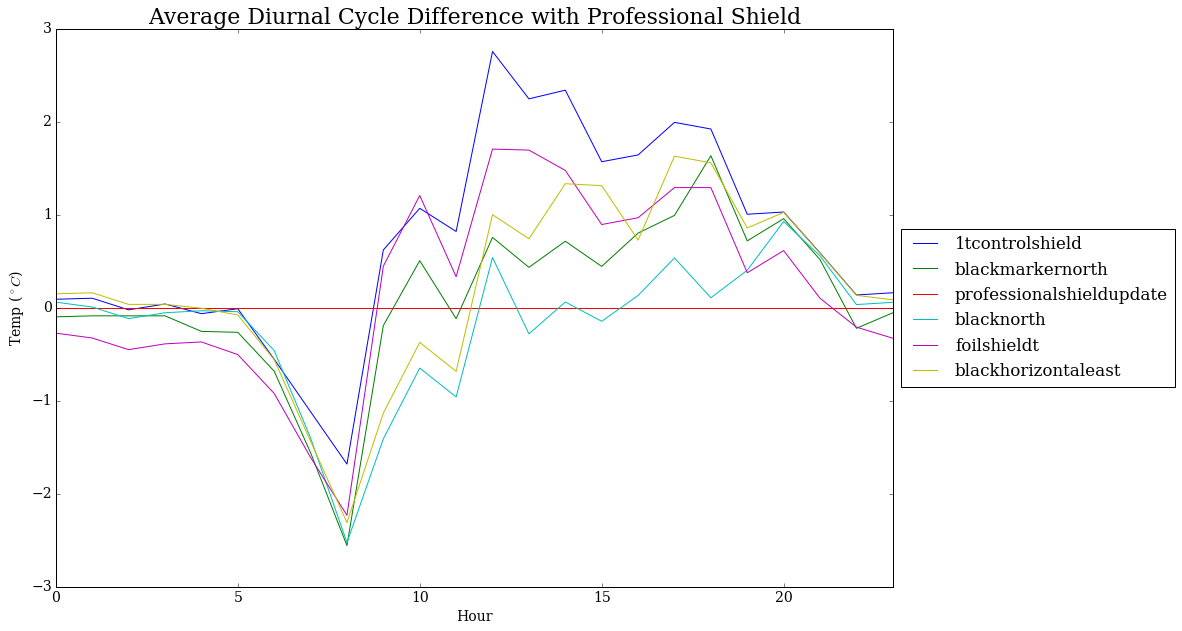

In [68]:
figsize = [15,10]
cols = [u'1tcontrolshield', 'blackmarkernorth', #u'oldshieldt',
        u'professionalshieldupdate',u'blacknorth', u'foilshieldt', 'blackhorizontaleast']
tempDF[cols].plot(figsize= figsize)
plt.legend(#legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Time Series')
plt.ylabel('Temp ($^\circ C$)')

tempDF[cols].groupby(tempDF.index.hour).mean().plot(figsize=figsize)
plt.legend(#legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Diurnal Cycle')
plt.ylabel('Temp ($^\circ C$)')
plt.xlabel('Hour')

tempDF[cols].subtract(tempDF['professionalshieldupdate'], axis=0).groupby(tempDF.index.hour).mean().plot(figsize=figsize)
plt.legend(#legendnames, 
           loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Average Diurnal Cycle Difference with Professional Shield')
plt.ylabel('Temp ($^\circ C$)')
plt.xlabel('Hour')

In [72]:
tempDF['blacknorth'].mean(), tempDF['professionalshieldupdate'].mean()

(24.846336956521743, 25.10901261261259)

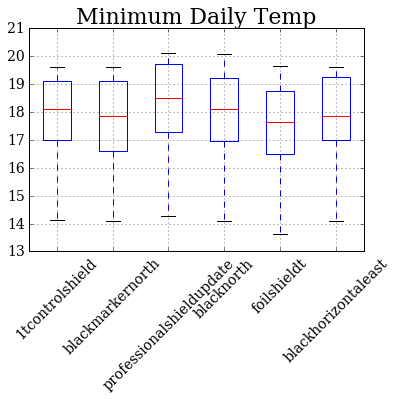

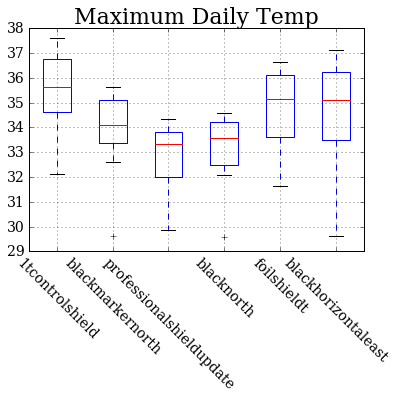

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
handle = tempDF[cols].resample('D').min().boxplot(return_type='axes')
plt.title('Minimum Daily Temp')
ax.set_xticklabels(cols, rotation=45 )

fig = plt.figure()
ax = fig.add_subplot(111)
handle = tempDF[cols].resample('D').max().boxplot(return_type='axes')
plt.title('Maximum Daily Temp')
ax.set_xticklabels(cols, rotation=-45 )

In [2]:
import importibuttondata
files = glob.glob('./data/rooftest2016/*[tT].csv')
meta0 = pd.DataFrame(pd.read_csv('./data/rooftest2016/TempSensor2016rooftest_results.csv', sep = ';'))
#pd.DataFrame(pd.read_csv('./data/bmoremetadata.csv', sep = ','))
tempDF, anomalyDF, meta = importibuttondata.importdata(files, meta0)

importibuttondata.py:28: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  meta = meta.sort(axis=0) # sort the data in order of the sensor number
importibuttondata.py:63: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  anomalyDF = pd.DataFrame(anomaly, tempDF.index, tempDF.columns).sort(axis=1)


In [2]:
# scp WIN\\ascott47@wha.eps.jhu.edu:/var/lib/weewx/olinhall-weewx.sdb .
import pandas as pd
import sqlite3
conn = sqlite3.connect('olinhall-weewx.sdb')
olinhalldf = pd.read_sql_query('SELECT * from archive', conn)
olinhalldf['dateTime']=pd.to_datetime(olinhalldf['dateTime'], unit='s')
olinhalldf.outTemp = (olinhalldf.outTemp-32)*5./9.
olinhalldf = olinhalldf.set_index('dateTime')
olinhalldf.index = olinhalldf.index - pd.DateOffset(hours  = 5)

In [3]:
olinhalldf.to_csv('OlinHallWeatherData2015-2016.csv')

In [4]:
startDate = tempDF.index[0]
endDate = tempDF.index[-1]

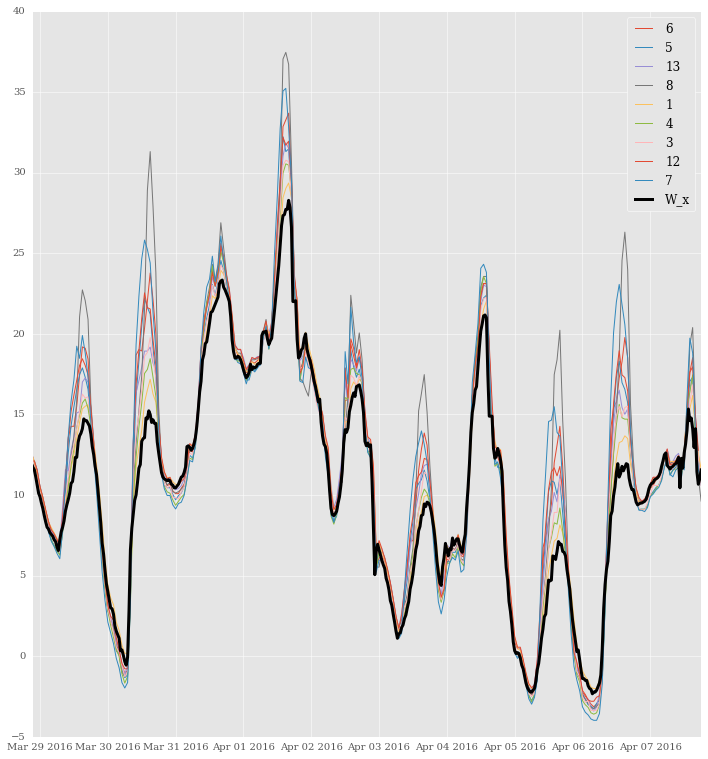

In [78]:
figure = plt.figure(figsize=[12,13])

for column in tempDF: 
    plt.plot(tempDF[startDate:endDate][column], label = column)
plt.plot(olinhalldf[startDate:endDate].outTemp, label = 'W_x', color = 'black', linewidth = 3)
plt.legend()

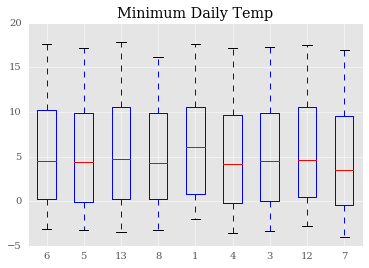

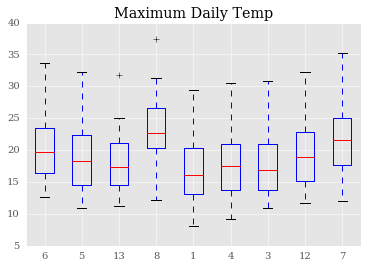

In [33]:
handle = tempDF.resample('D', how = 'min').boxplot(return_type='axes')
plt.title('Minimum Daily Temp')

plt.figure()
handle = tempDF.resample('D', how = 'max').boxplot(return_type='axes')
plt.title('Maximum Daily Temp')

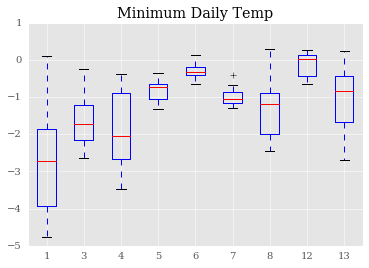

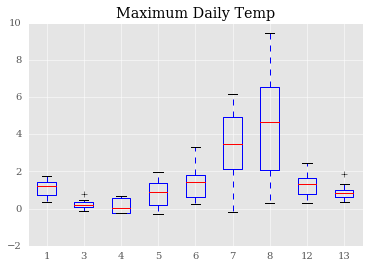

In [34]:
handle = anomalyDF.resample('D', how = 'min').boxplot(return_type='axes')
plt.title('Minimum Daily Temp')

plt.figure()
handle = anomalyDF.resample('D', how = 'max').boxplot(return_type='axes')
plt.title('Maximum Daily Temp')

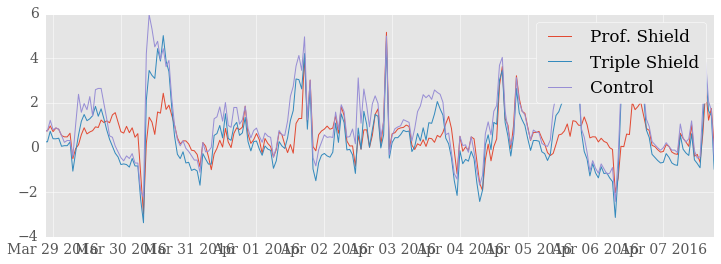

In [10]:
buttons = [1,3,13]
diff = tempDF[startDate:endDate][buttons].subtract(olinhalldf[startDate:endDate].outTemp.resample('H'), axis = 0)

fig = plt.figure(figsize=[12,4])
handle = plt.plot(diff)
plt.legend(['Prof. Shield', 'Triple Shield', 'Control'])

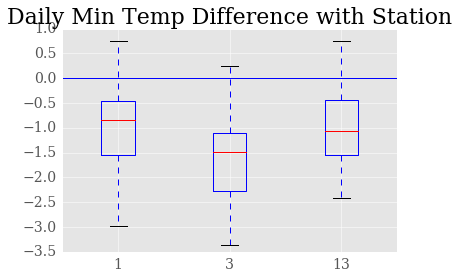

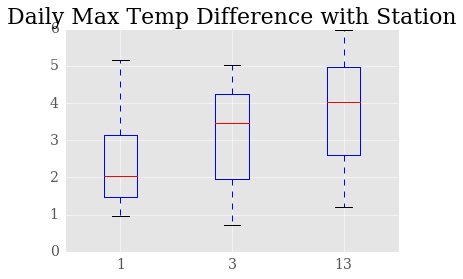

In [20]:
a = diff.resample('D', how = 'min').boxplot(return_type='axes')
plt.axhline(0)
plt.title('Daily Min Temp Difference with Station')

plt.figure()
a = diff.resample('D', how = 'max').boxplot(return_type='axes')
plt.axhline(0)
plt.title('Daily Max Temp Difference with Station')

/Users/annascott2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':
/Users/annascott2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


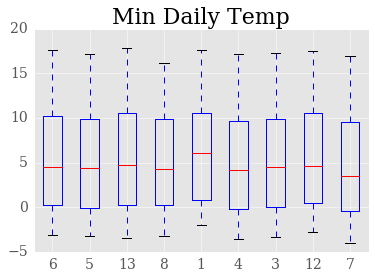

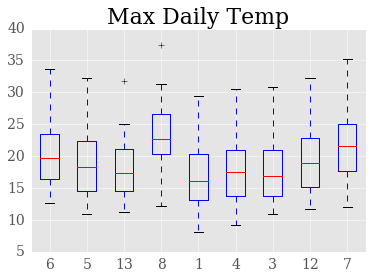

In [24]:
handle = tempDF.resample('D', how = 'min').boxplot()
plt.title('Min Daily Temp')
plt.figure()
handle = tempDF.resample('D', how = 'max').boxplot()
plt.title('Max Daily Temp')
